# Задача Титаника
###Данные для работы

- **Survival** : выживший (0 = Нет, 1 = Да)
- **Pclass**   : класс пассажира (1 = 1ый, 2 = 2й, 3 = 3й)
- **Sex** : пол 
- **Age** : возраст
- **Sibsp** : # количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника
- **Parch** : # количество родителей, детей (в том числе приемных) на борту титаника
- **Ticket** : номер билета
- **Fare** # плата за проезд 
- **Cabin** : каюта
- **Embarked** : порт посадки.(C = Cherbourg, Q = Queenstown, S = Southampton)


### Заметки о переменнных

**Pclass:** Показатель социально-экономического статуса (СЭС)
- 1st = Высший
- 2nd = Средний
- 3rd = Низший

**Age:** Возраст является дробным, если меньше 1. Если возраст оценивается, то в виде xx.5

** Sibsp**  Набор данных определяет семейные отношения таким образом...
- Sibling = брат, сестра, сводный брат, сводная сестра
- Spouse = муж, жена (любовницы и женихи были проигнорированы)

**Parch:** Набор данных определяет семейные отношения таким образом...
- Parent = мать, отец
- Child = дочь, сын, падчерица, пасынок
- Некоторые дети путешествовали только с няней, поэтому ставим parch=0 для них.

## Вопросы исследования.

- **Играл ли пол какую-либо роль в выживании?**
- **Играл ли Pclass(показатель социально-экономического статуса (СЭС)) какую-либо роль в выживании?**
- **Получали ли женщины  или представители какого-либо определенного Pclass особый приоритет?**
- **Получали ли представители какого-либо определенного возраста приоритет над другими возрастными группами?**
- **Играли ли семейные отношения какую-либо роль в выживании?**

## Загружаем данные из Csv файла

Загрузим данные из файла при помощи pandas 

In [ ]:
import pandas as pd

titanic_data = pd.read_csv('train (1).csv')
titanic_data.describe()

- Приведенные выше данные показывают, что количество данных во всех столбцах равно 891, за исключением возраста, который мы будем обрабатывать в части исследования данных о возрасте. 

## Очистка данных

- Как мы видим, данные о каютах в основном содержат NaN и будут не очень полезны для исследования,
- И также точно с колонкой порта посадки и  платы за проезд. Эти данные не особо информативны, так что исключим их.

In [ ]:
del titanic_data['Cabin']
del titanic_data['Embarked']
titanic_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250


## Общие показатели

Исходные данные содержат колонку 'survived', значение которой колеблется от нуля до единицы, используя это значение мы можем вычислить общее количество погибших и выживших пассажиров

In [ ]:
total_no_passengers = len(titanic_data['PassengerId'])
survival_data = titanic_data['Survived']
survivied = (survival_data == 1).sum()
casualties = (survival_data == 0).sum()

print('------------------------------------------')
print('Общее число пассажиров на борту: ',total_no_passengers)
print('Общее число выживших: ',survivied)
print('Общее число погибших: ',casualties)
print('------------------------------------------')

- Диаграмма ниже показывают распределение погибших и выживших пассажиров

Populating the interactive namespace from numpy and matplotlib


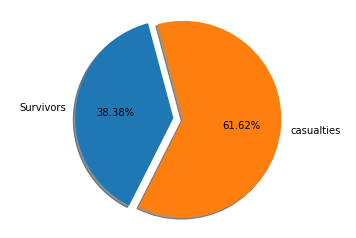

In [ ]:
%pylab inline
import matplotlib.pyplot as plt

def drawPieChart(labels,sizes,explode,startangle):
    '''
    Функция для вывода диаграммы
    '''
    plt.pie(sizes, explode=explode, labels=labels,autopct='%1.2f%%', shadow=True, startangle=startangle) 
    plt.axis('equal')
    plt.show()
    
drawPieChart(['Survivors', 'casualties'],[survivied,casualties],(0.1, 0),105)    

## Общие показатели по полу

Приведенные выше показатели показывают общее число выживших и пострадавших, теперь рассмотрим эти показатели в зависимости от пола.
Используя гендерные данные и данные о выживании, мы можем подсчитать общее число выживших женщин и мужчин. когда мы подсчитываем выживших женщин и выживших мужчин в процентах от общего числа выживших, мы обнаруживаем, что выжившие женщины составляют (68,13%), а выжившие мужчины составляют (31,87%). Используя эту информацию, мы можем сказать, что женщинам отдавалось больше предпочтений в использовании спасательных материалов, таких как спасательные шлюпки и т.д.



In [ ]:
gender_data = titanic_data['Sex']

male_count = (gender_data == 'male').sum()
female_count = (gender_data == 'female').sum()

male_survivors = ((gender_data == 'male') & (survival_data == 1)).sum()
female_survivors = ((gender_data == 'female') & (survival_data == 1)).sum()

male_casualties = male_count - male_survivors
female_casualties = female_count - female_survivors

print('-------------------------------------')
print('Общее число мужчин: ',male_count)
print('Общее число выживших мужчин: ',male_survivors)
print('Общее число погибших мужчин: ',male_casualties)
print('--------------------------------------')
print('Общее число женщин: ',female_count)
print('Общее число выживших женщин: ',female_survivors)
print('Общее число погибших женщин: ',female_casualties)
print('--------------------------------------')

      -------------------------------------
      Общее число мужчин:  577
      Общее число выживших мужчин:  109
      Общее число погибших мужчин:  468
      --------------------------------------
      Общее число женщин:  314
      Общее число выживших женщин:  233
      Общее число погибших женщин:  81
      --------------------------------------

- Диаграмма ниже отображает распределение выживших мужчин и выживших женщин

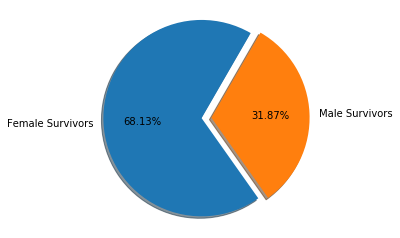

In [ ]:
drawPieChart(['Female Survivors', 'Male Survivors'],[female_survivors,male_survivors],(0.1, 0),60)

## Изучим выживших на основе класса пассажира

Рассмотрим погибших в зависимости от класса (показатель социально-экономического статуса (СЭС), 1-й = Верхний, 2-й = средний, 3-й = Нижний), чтобы выяснить, был ли пассажирам предоставлен приоритет в зависимости от их класса.

In [ ]:
pclass = titanic_data['Pclass']
pclass_values = sort(pclass.unique())

def calculateSurvivalRate(condition=True):
    '''
    Function to calculate survival Rates
    '''
    print('----------------------------------') 
    for val in pclass_values:
        pclass_count = ((pclass == val) & (condition)).sum()
        pclass_survivors = ((pclass == val)&(survival_data == 1) & (condition)).sum()
        pclass_casualties = ((pclass == val)&(survival_data == 0) & (condition)).sum()
        
        print('Pclass {0}: '.format(val))
        print('Общее количество : ',pclass_count)
        print('Общее число выживших: ',pclass_survivors)
        print('Общее число погибших: ',pclass_casualties)
        print('Коэффициент выживаемости: {0}%'.format(round((pclass_survivors/pclass_count)*100.0,2)))
        print('----------------------------------') 

In [ ]:
calculateSurvivalRate()

      ----------------------------------
      Pclass 1: 
      Общее количество :  216
      Общее число выживших:  136
      Общее число погибших:  80
      Коэффициент выживаемости: 62.96%
      ----------------------------------
      Pclass 2: 
      Общее количество :  184
      Общее число выживших:  87
      Общее число погибших:  97
      Коэффициент выживаемости: 47.28%
      ----------------------------------
      Pclass 3: 
      Общее количество :  491
      Общее число выживших:  119
      Общее число погибших:  372
      Коэффициент выживаемости: 24.24%
      ----------------------------------

- Исходя из вышеперечисленных показателей, мы можем сказать, что людям из высшего класса (pclass = 1) был отдан приоритет, поскольку у них был самый высокий уровень выживаемости (62,96%), что превышает показатели выживаемости как среднего, так и низшего класса. Построим гистограмму потерь, чтобы получить более точную картину

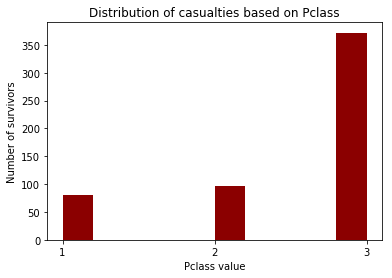

In [ ]:
pclass_casualties = pclass[survival_data == 0]

def drawHistogram(data,title,xlabel,ylabel,xticks=None,yticks=None,bins=None,color=None):
    '''
    Функция для построения диаграммы
    '''
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if xticks != None :
        plt.xticks(xticks)
    if yticks != None :
        plt.yticks(yticks)
    plt.hist(data,bins=bins,color=color)
    plt.show()

drawHistogram(pclass_casualties,'Distribution of casualties based on Pclass',
              'Pclass value','Number of survivors',range(1,4),color='DarkRed')

- Приведенная выше гистограмма показывает распределение жертв в зависимости от их p-класса, поскольку мы можем наблюдать, что у низшего класса наибольшее количество жертв по сравнению с высшим классом и средним классом. Итак, теперь мы можем сказать, что люди низшего класса получили наименьший приоритет в отношении спасательных материалов, таких как спасательные шлюпки и т.д. 
- Поскольку мы уже знаем, что женщинам уделялось больше внимания, чем мужчинам, давайте рассмотрим выживаемость женщин в зависимости от класса, чтобы увидеть, получили ли женщины какого-либо конкретного класса особый приоритет

In [ ]:
calculateSurvivalRate(gender_data == 'female')

- Приведенные выше данные показывают, что женщины высшего и среднего классов получили приоритет, поскольку у них были самые высокие показатели выживаемости (96,81%) и (92,11%) по сравнению с женщинами низшего класса, у которых показатель выживаемости составлял всего (50%). 
- Приведенная ниже гистограмма показывает распределение жертв среди женщин в зависимости от класса.

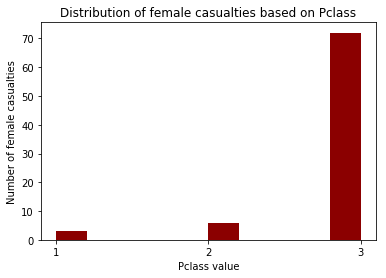

In [ ]:
pclass_female_casualties = pclass[(survival_data == 0) & (gender_data == 'female')]
drawHistogram(pclass_female_casualties,'Distribution of female casualties based on Pclass',
              'Pclass value','Number of female casualties',xticks=range(1,4),color='DarkRed')

- Теперь давайте рассмотрим выживание мужчин в зависимости от класса, чтобы увидеть, получили ли мужчины какого-либо конкретного класса особый приоритет.

In [ ]:
calculateSurvivalRate(gender_data == 'male')

----------------------------------
Pclass 1 : 
Общее количество :  122
Общее число выживших:  45
Общее число погибших:  77
Коэффициент выживаемости: 36.89%
----------------------------------
Pclass 2 : 
Общее количество :  108
Общее число выживших:  17
Общее число погибших:  91
Коэффициент выживаемости: 15.74%
----------------------------------
Pclass 3 : 
Общее количество :  347
Общее число выживших:  47
Общее число погибших:  300
Коэффициент выживаемости: 13.54%
----------------------------------

- Приведенные выше показатели показывают, что мужчины какого-либо конкретного класса не получили особого приоритета, поскольку каждый класс имеет низкие показатели выживаемости. Еще один момент, который следует отметить, заключается в том, что в классе 3 больше всего смертей среди мужчин, на долю которых приходится 300.
- Приведенная ниже гистограмма показывает распределение жертв среди мужчин на основе Pclass.

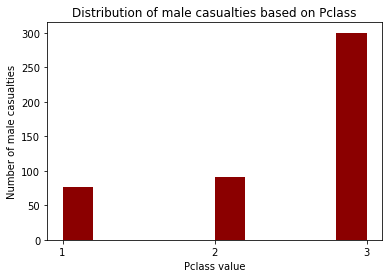

In [ ]:
pclass_male_casualties = pclass[(survival_data == 0) & (gender_data == 'male')]
drawHistogram(pclass_male_casualties,'Distribution of male casualties based on Pclass',
              'Pclass value','Number of male casualties',xticks=range(1,4),color='DarkRed')

## Изучение выживших на основе пола и возраста

- В этой части исследования данных я хочу проверить, сыграл ли возраст какую-либо роль в выживании.
- В качестве первого шага к исследованию данных о возрасте давайте посмотрим на данные о возрасте на предмет любых аномалий.

In [ ]:
titanic_data[['PassengerId','Survived','Name','Sex','Age']].head(7)

,PassengerId,Survived,Name,Sex,Age
0,1,0,"Braund, Mr. Owen Harris",male,22.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,3,1,"Heikkinen, Miss. Laina",female,26.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,5,0,"Allen, Mr. William Henry",male,35.0
5,6,0,"Moran, Mr. James",male,NaN
6,7,0,"McCarthy, Mr. Timothy J",male,54.0


- Поскольку мы видим, что строка номер 5 содержит NaN в столбце возраста, нужно отбросить все эти значения, прежде чем принимать во внимание данные о возрасте
- Теперь  взглянем на некоторые показатели для данных о возрасте.

In [ ]:
age_data = titanic_data['Age']
survived_age_data = age_data[survival_data==1].dropna()
casualties_age_data = age_data[survival_data==0].dropna()

oldest_to_survive = survived_age_data.max()
youngest_to_survive = survived_age_data.min()

oldest_to_die = casualties_age_data.max()
youngest_to_die = casualties_age_data.min()

mean_age_survivors = survived_age_data.mean()
mean_age_casualties = casualties_age_data.mean()

print('------------------------------')
print('Старейший выживший: ',oldest_to_survive)
print('Самый молодой выживший: ',youngest_to_survive)
print('------------------------------')
print('Старейший умерший: ',oldest_to_die)
print('Самый молодой умерший: ',youngest_to_die)
print('------------------------------')
print('Средний возраст выживших: ',round(mean_age_survivors,2))
print('Средний возраст погибших: ',round(mean_age_casualties,2))
print('------------------------------')

------------------------------
Старейший выживший:  80.0
Самый молодой выживший:  0.42
------------------------------
Старейший умерший:  74.0
Самый молодой умерший:  1.0
------------------------------
Средний возраст выживших:  28.34
Средний возраст погибших:  30.63
------------------------------

- Теперь построим данные о возрасте как выживших, так и пострадавших, чтобы увидеть, отдавалось ли предпочтение какой-либо конкретной возрастной группе.

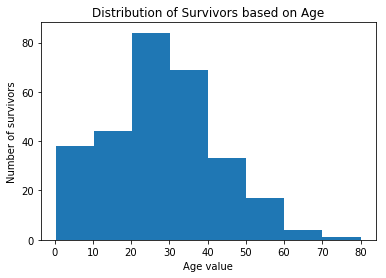

In [ ]:
drawHistogram(survived_age_data,'Distribution of Survivors based on Age',
              'Age value','Number of survivors',yticks=range(0,120,20),bins=8)

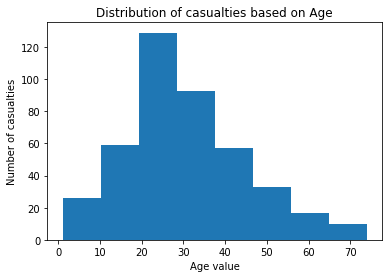

In [ ]:
drawHistogram(casualties_age_data,'Distribution of casualties based on Age',
              'Age value','Number of casualties',bins=8)

- Когда мы наблюдаем распределение данных по возрасту, даже при том, что мы видим небольшое увеличение данных в возрасте [0-10] выживших по сравнению с данными о возрасте жертв, мы не можем сказать или заключить, что дети могли бы получить какое-то предпочтение, потому что нет большой разницы между общим числом выживших и погибших, которым было меньше 10 лет. 

- Давайте рассмотрим данные нескольких пассажиров, которым было меньше 10 лет и которые не выжили.


In [ ]:
child_casualties_data = titanic_data[(age_data < 10) & (survival_data == 0)]
child_casualties_data[['PassengerId','Survived','Name','Sex','Age','Ticket','Parch','Pclass']].head(10)

,PassengerId,Survived,Name,Sex,Age,Ticket,Parch,Pclass
7,8,0,"Palsson, Master. Gosta Leonard",male,2.0,349909,1,3
16,17,0,"Rice, Master. Eugene",male,2.0,382652,1,3
24,25,0,"Palsson, Miss. Torborg Danira",female,8.0,349909,1,3
50,51,0,"Panula, Master. Juha Niilo",male,7.0,3101295,1,3
63,64,0,"Skoog, Master. Harald",male,4.0,347088,2,3
119,120,0,"Andersson, Miss. Ellis Anna Maria",female,2.0,347082,2,3
147,148,0,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,W./C. 6608,2,3
164,165,0,"Panula, Master. Eino Viljami",male,1.0,3101295,1,3
171,172,0,"Rice, Master. Arthur",male,4.0,382652,1,3
182,183,0,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,347077,2,3


- Основываясь на приведенных выше данных, давайте рассмотрим данные членов семьи этих детей. Чтобы изучить семейные данные, нам нужно принять во внимание стоимость билета, поскольку люди могли забронировать билеты по одинаковой стоимости для всех членов своей семьи.

In [ ]:
ticket_data = titanic_data['Ticket']
ticket_bool = (ticket_data == '349909')|(ticket_data == '382652')|(ticket_data == '347088')|(ticket_data == '3101295')
titanic_data[(age_data > 10) &(ticket_bool) ][['PassengerId','Survived','Name','Sex','Age','Ticket','Parch']].head(10)

,PassengerId,Survived,Name,Sex,Age,Ticket,Parch
167,168,0,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,347088,4
266,267,0,"Panula, Mr. Ernesti Arvid",male,16.0,3101295,1
360,361,0,"Skoog, Mr. Wilhelm",male,40.0,347088,4
567,568,0,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,349909,4
638,639,0,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,3101295,5
686,687,0,"Panula, Mr. Jaako Arnold",male,14.0,3101295,1
885,886,0,"Rice, Mrs. William (Margaret Norton)",female,39.0,382652,5


- Приведенные выше данные показывают, что никто из членов их семьи не выжил.
- Теперь давайте рассмотрим данные, относящиеся к детям, которые выжили и которым было меньше 10 лет.

In [ ]:
child_survivors_data = titanic_data[(age_data < 10) & (survival_data == 1)]
child_survivors_data[['PassengerId','Survived','Name','Sex','Age','Ticket','Parch','Pclass']].head(10)

,PassengerId,Survived,Name,Sex,Age,Ticket,Parch,Pclass
10,11,1,"Sandstrom, Miss. Marguerite Rut",female,4.00,PP 9549,1,3
43,44,1,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,SC/Paris 2123,2,2
58,59,1,"West, Miss. Constance Mirium",female,5.00,C.A. 34651,2,2
78,79,1,"Caldwell, Master. Alden Gates",male,0.83,248738,2,2
165,166,1,"Goldsmith, Master. Frank John William ""Frankie""",male,9.00,363291,2,3
172,173,1,"Johnson, Miss. Eleanor Ileen",female,1.00,347742,1,3
183,184,1,"Becker, Master. Richard F",male,1.00,230136,1,2
184,185,1,"Kink-Heilmann, Miss. Luise Gretchen",female,4.00,315153,2,3
193,194,1,"Navratil, Master. Michel M",male,3.00,230080,1,2
233,234,1,"Asplund, Miss. Lillian Gertrud",female,5.00,347077,2,3


- Теперь давайте рассмотрим данные членов семьи, связанные с этими детьми.

In [ ]:
ticket_bool = ((ticket_data == '248738')|(ticket_data == 'SC/Paris 2123')|(ticket_data == '363291')|(ticket_data == '347077')
               |(ticket_data == 'C.A. 34651')|(ticket_data == 'F.C.C. 13529'))
data = titanic_data[(age_data > 10)&(ticket_bool)][['PassengerId','Survived','Name','Sex','Age','Ticket','Parch','Pclass']]

def highlight_max(s):
    '''
    чтобы выделить мужчин в таблице
    '''
    is_max = s == 0
    if is_max['Survived'] :
        is_max = is_max | True  
         
    return ['background-color: #ff9999' if v else '' for v in is_max]

data.style.apply(highlight_max,axis=1)

- Приведенные выше данные показывают данные, относящиеся к членам семей детей, переживших катастрофу. Данные показывают, что мужчины (ряды красного цвета) не пережили катастрофу. Вероятно, теперь мы можем убедиться в том факте, что предпочтение отдавалось женщинам и детям.
- Другие факты, которые мы можем извлечь из полученных данных, таковы: если у семьи не было шанса выжить, то в этом случае погибла вся семья, включая детей. 
- Если в по счастливому стечени обстоятельств семья получала шанс выжить, то предпочтение отдавалось женщинам и детям этой семьи. Хотя могут быть некоторые отклонения по отношению к вышеупомянутым двум сценариям, но оба сценария верны в большинстве случаев.  

## Исследование погибших и выживших на основе количества родственников (Parch)
- Изучим данные Parch и посмотрим, сыграли ли семейные отношения какую-либо роль в выживании пассажиров.

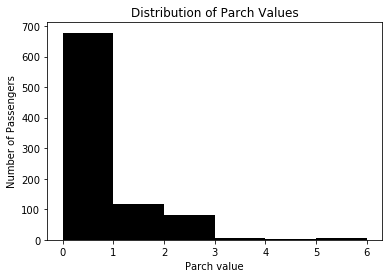

In [ ]:
parch_data = titanic_data['Parch']
survived_parch_data = parch_data[survival_data==1]
casualties_parch_data = parch_data[survival_data==0]

drawHistogram(parch_data,'Distribution of Parch Values','Parch value','Number of Passengers',bins=6,color='k')

- Приведенная выше гистограмма показывает, что у большинства пассажиров значение parch было равно "нулю", то есть они путешествовали одни и не имели никаких иждивенцев. 
- Поскольку значение Parch указывает как на количество родителей / детей на борту "Титаника", мы не сможем ответить на такие вопросы, как выживание женщин против выживания женщин с детьми, так и на значение parch для большинства пассажиров, равное нулю, поэтому здесь не так много для изучения в отношении значения parch.

## Некоторые разные факты
- Все дети, которым было меньше года, пережили катастрофу.

In [ ]:
misc_data = titanic_data[(age_data < 1)][['PassengerId','Survived','Pclass','Name','Sex','Age','Parch',]]

def highlight_age(s):
    '''
    Выделить возраст в таблице красным цветом
    '''
    s['Age'] = math.floor(s['Age'])
    is_max = s == 0
    return ['background-color: #ff9999' if v else '' for v in is_max]

misc_data.style.apply(highlight_age,axis=1)

- Большинство детей, которым было меньше 10 лет и которые не пережили катастрофу, принадлежат к 3-ему классу пассажиров

In [ ]:
misc_data = child_casualties_data[['PassengerId','Survived','Pclass','Name','Sex','Age','Parch']]
def highlight_class(s):
    '''
    Выделить класс в таблице красным цветом
    '''
    is_max = s == 3
    is_max['Age'] = False 
    return ['background-color: #ff9999' if v else '' for v in is_max]

misc_data.style.apply(highlight_class,axis=1)

- Люди, которые заплатили самую высокую цену, принадлежали к классу и пережили катастрофу "Титаника".

In [ ]:
index = titanic_data['Fare'].argmax()
ticket_max = titanic_data.iloc[index]['Ticket']
titanic_data[titanic_data['Ticket'] == ticket_max]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292


- Около 50% выживших мужчин 2-го класса - дети в возрасте до 10 лет.

In [ ]:
misc_data = (titanic_data[(pclass == 2)&(gender_data == 'male') & (survival_data == 1)]
             [['PassengerId','Survived','Pclass','Name','Sex','Age','Parch']])

def highlight_age_lessThan10(s):
    '''
    Выделить возраст в таблице красным цветом
    '''
    is_max = [False,False,False,False,False,False,False]
    if s['Age'] < 10.0:
        is_max[5] = True 
          
    return ['background-color: #ff9999' if v else '' for v in is_max]

misc_data.style.apply(highlight_age_lessThan10,axis=1)

## Заключение :

Из приведенного выше анализа данных мы можем сделать следующий вывод 
- Женщинам был дан приоритет перед мужчинами в средствах спасения, таких как спасательные шлюпки, потому что, основываясь на анализе исследования пола, женщины имели шанс спасения 68.13%, что значительно выше, чем у мужчин.
- Женщины из высшего и среднего классов получили наивысший приоритет, потому что исследование Pclass показало, что выживаемость женщин из высшего и среднего классов составляла более 90%.
- В ходе исследования возрастных данных выяснили, что если семья не получала шанса выжить, то погибала вся семья, включая детей, и если в случае, если семья получала шанс выжить, то приоритет отдавался женщинам и детям.  
 